### Implementation of Content-Base filtering 

In [12]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import glob

import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk import pos_tag
import string

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
def create_dataframe(folder_name):
    
    captions = []
    images = []
    labels = []

    dataset = pd.DataFrame(columns=['caption', 'image', 'label'])

    folders_sentences = glob.glob('./dataset/{}/sentences/*'.format(folder_name))
    folders_images = glob.glob('./dataset/{}/images/*'.format(folder_name))
    
    for folder in folders_sentences:
        classes = glob.glob('{}/*.txt'.format(folder))
        for caption in classes:
            with open(caption, 'r') as file:
                inside_file = file.read()
                label = str(folder).split('\\')[1]
                lines = ''
                for line in inside_file.split('\n'):
                    if line:
                        lines += ' ' + line
                        
                captions.append(lines)
                labels.append(label)
                
    for folder in folders_images:
        classes = glob.glob('{}/*.jpg'.format(folder))
        for image in classes:
            images.append(image)
    
    for i in range(len(captions)):
        dataset = dataset.append({'caption': captions[i], 'image': images[i], 'label': labels[i]}, ignore_index=True)
        
    return dataset

In [3]:
dataset = create_dataframe('train')
dataset

,caption,image,label
0,Two gentleman talking in front of propeller p...,./dataset/train/images\aeroplane\2008_001227.jpg,aeroplane
1,A D-ERFW-6 in flight. An army green plane fly...,./dataset/train/images\aeroplane\2008_001380.jpg,aeroplane
2,a larger plane in flying above a smaller plan...,./dataset/train/images\aeroplane\2008_001448.jpg,aeroplane
3,A blue grounded fighter jet is parked on gras...,./dataset/train/images\aeroplane\2008_001468.jpg,aeroplane
4,An airplane sitting on the tarmac at an airpo...,./dataset/train/images\aeroplane\2008_001801.jpg,aeroplane
...,...,...,...
527,A computer with two monitors on a white desk....,./dataset/train/images\tvmonitor\2008_004908.jpg,tvmonitor
528,"A living room with TV, books, vacuum, and acc...",./dataset/train/images\tvmonitor\2008_004910.jpg,tvmonitor
529,A close-up of a television monitor with a man...,./dataset/train/images\tvmonitor\2008_004930.jpg,tvmonitor
530,A home office set up complete with a can of s...,./dataset/train/images\tvmonitor\2008_005008.jpg,tvmonitor


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   caption  532 non-null    object
 1   image    532 non-null    object
 2   label    532 non-null    object
dtypes: object(3)
memory usage: 12.6+ KB


In [5]:
test = create_dataframe('test')
test

,caption,image,label
0,An airplane facing the camera. A plane is sit...,./dataset/test/images\aeroplane\2008_006700.jpg,aeroplane
1,A gray jet on a tarmac. An airplane being ins...,./dataset/test/images\aeroplane\2008_006933.jpg,aeroplane
2,An airplane flies against a colorful sky with...,./dataset/test/images\aeroplane\2008_007095.jpg,aeroplane
3,"Two bi-planes are flying side by side, emitti...",./dataset/test/images\aeroplane\2008_007442.jpg,aeroplane
4,A blue and orange airplane flying with its la...,./dataset/test/images\aeroplane\2008_007504.jpg,aeroplane
...,...,...,...
375,A man in a Ninja Turtles t-shirt repairs tele...,./dataset/test/images\tvmonitor\2008_007446.jpg,tvmonitor
376,A darkened desk with a desktop PC and a lamp....,./dataset/test/images\tvmonitor\2008_007916.jpg,tvmonitor
377,A computer desk displays elvis memorabilia. A...,./dataset/test/images\tvmonitor\2008_007987.jpg,tvmonitor
378,a computer on the floor A Macintosh computer ...,./dataset/test/images\tvmonitor\2008_008269.jpg,tvmonitor


In [6]:
def nlprocess(dataset):
    
    preprocessed_comments = []
    for _, (caption, _, label) in dataset.iterrows():

        #Lowercase
        caption = caption.lower()

        # Removing Punctuation
        caption = "".join([char for char in caption if char not in string.punctuation])

        # Word Tokenization
        caption = word_tokenize(caption)

        # Stopword Filtering
        stop_words = stopwords.words('english')
        caption = [word for word in caption if word not in stop_words]

        # Stemming
        porter = PorterStemmer()
        caption = [porter.stem(word) for word in caption]

        caption = ' '.join(caption)

        preprocessed_comments.append(caption)

    return preprocessed_comments

In [7]:
def vectorizer(dataset):
    string = dataset.to_string(header=False,index=False).split('\n')
    tfidf = TfidfVectorizer(stop_words='english')
    dataset_matrix = tfidf.fit_transform(string)
    similar_matrix = linear_kernel(dataset_matrix,dataset_matrix)
    return similar_matrix

In [8]:
similarity_matrix = vectorizer(dataset)
similarity_matrix

array([[1.        , 0.30329279, 0.18003365, ..., 0.0031208 , 0.00310624,
        0.00370211],
       [0.30329279, 1.        , 0.43085084, ..., 0.00335084, 0.0033352 ,
        0.00397499],
       [0.18003365, 0.43085084, 1.        , ..., 0.00743357, 0.00349503,
        0.0133789 ],
       ...,
       [0.0031208 , 0.00335084, 0.00743357, ..., 1.        , 0.08108143,
        0.21161333],
       [0.00310624, 0.0033352 , 0.00349503, ..., 0.08108143, 1.        ,
        0.05557233],
       [0.00370211, 0.00397499, 0.0133789 , ..., 0.21161333, 0.05557233,
        1.        ]])

In [9]:
def cal_sim_score(similarity_matrix,input_index):
    similarity_score = list(enumerate(similarity_matrix[input_index])) 
    similarity_score = sorted(similarity_score, key=lambda x: x[1], reverse=True)
    similarity_score = similarity_score[:11]
    return similarity_score

In [10]:
def most_similar_captions(caption_index, dataset, test):
    
    query_test = test.iloc[caption_index, :]
    
    dataset = dataset.append({'caption': query_test.caption, 'image': query_test.image, 'label': query_test.label}, ignore_index=True)
    
    dataset.caption = nlprocess(dataset)
    
    similarity_matrix = vectorizer(dataset)
    
    similarity_score = cal_sim_score(similarity_matrix, caption_index)
    caption_indices = [i[0] for i in similarity_score]
    return pd.DataFrame(dataset.iloc[caption_indices])

In [11]:
query_index = 55
top10 = most_similar_captions(query_index, dataset, test)
top10.reset_index(inplace=True)
top10

,index,caption,image,label
0,55,bicyclist black black red race bike boy wear r...,./dataset/train/images\bicycle\2008_006467.jpg,bicycle
1,40,bicycl race suburban neighborhood crowd watch ...,./dataset/train/images\bicycle\2008_003819.jpg,bicycle
2,52,man look bicycl race spectat watch bicycl race...,./dataset/train/images\bicycle\2008_006154.jpg,bicycle
3,35,bicycl racer road rural area man green yellow ...,./dataset/train/images\bicycle\2008_002894.jpg,bicycle
4,54,bicycl racer front car two bike top bicyclist ...,./dataset/train/images\bicycle\2008_006254.jpg,bicycle
5,30,bicyclist stick tongu camera male biker dress ...,./dataset/train/images\bicycle\2008_001402.jpg,bicycle
6,150,motion shot right side red ferrari red ferrari...,./dataset/train/images\car\2008_001632.jpg,car
7,45,peopl ride tandem bicycl spectat watch racer t...,./dataset/train/images\bicycle\2008_004603.jpg,bicycle
8,317,hors gallop wear number 4 race hors gallop wit...,./dataset/train/images\horse\2008_003447.jpg,horse
9,53,black white photo bicycl black white photo old...,./dataset/train/images\bicycle\2008_006234.jpg,bicycle


In [29]:
top10.image[0].dtype

AttributeError: 'str' object has no attribute 'dtype'

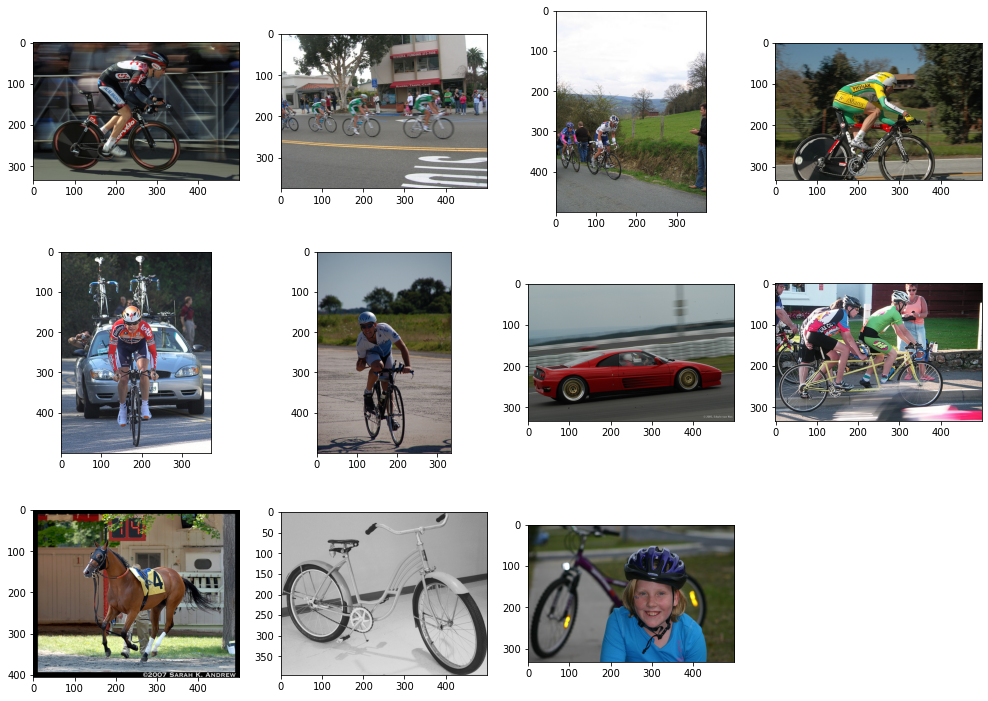

In [57]:
fig = plt.figure(figsize=(17, 17))

for i, (_, _, image, _) in top10.iterrows():
    
    ax1 = fig.add_subplot(4,4,i + 1)
    ax1 = plt.imread(image)
    ax1 = plt.imshow(ax1)
    
plt.show()